<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


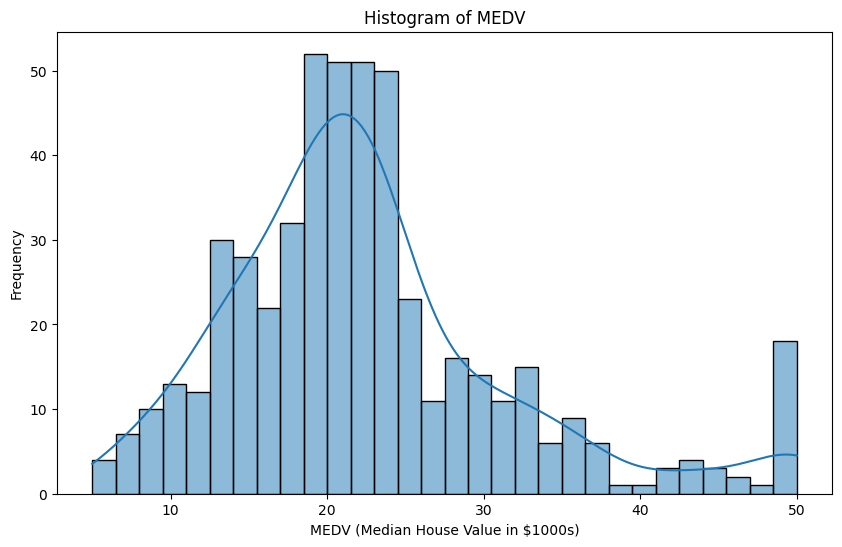

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(boston_df['MEDV'], bins=30, kde=True)
plt.title('Histogram of MEDV')
plt.xlabel('MEDV (Median House Value in $1000s)')
plt.ylabel('Frequency')
plt.show()

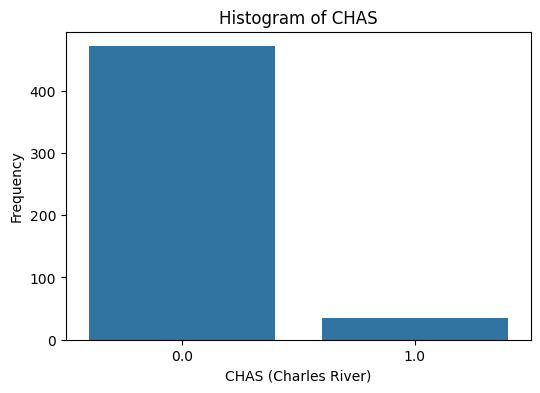

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Histogram of CHAS')
plt.xlabel('CHAS (Charles River)')
plt.ylabel('Frequency')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


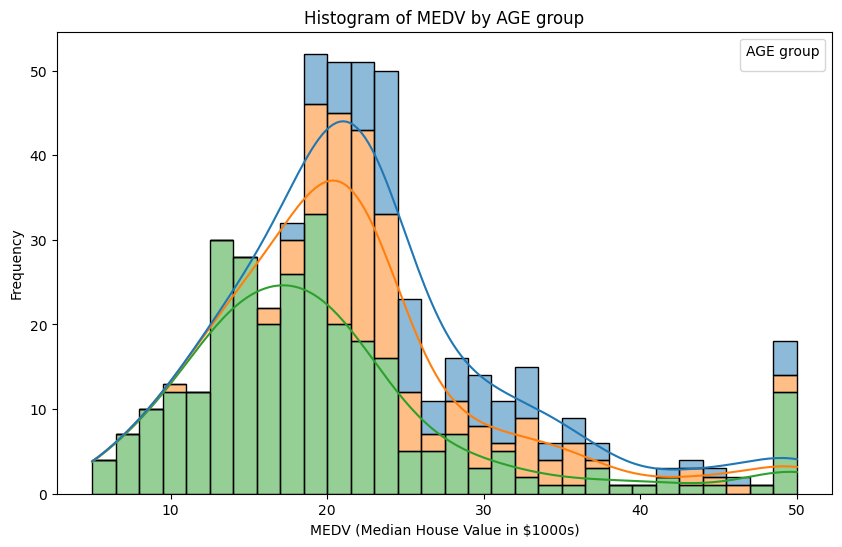

In [12]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', '35-70 years', '70 years and older'])

# Создаем гистограмму сравнения MEDV и AGE_group
plt.figure(figsize=(10, 6))
sns.histplot(x='MEDV', hue='AGE_group', data=boston_df, bins=30, kde=True, multiple='stack')
plt.title('Histogram of MEDV by AGE group')
plt.xlabel('MEDV (Median House Value in $1000s)')
plt.ylabel('Frequency')
plt.legend(title='AGE group')
plt.show()

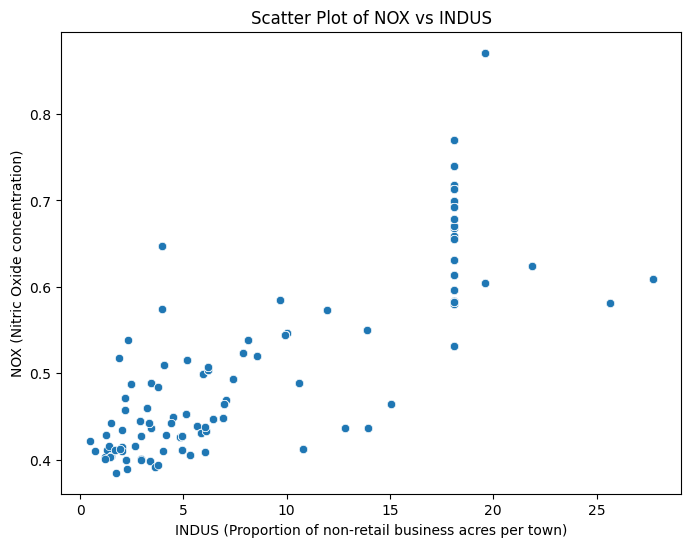

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('INDUS (Proportion of non-retail business acres per town)')
plt.ylabel('NOX (Nitric Oxide concentration)')
plt.show()

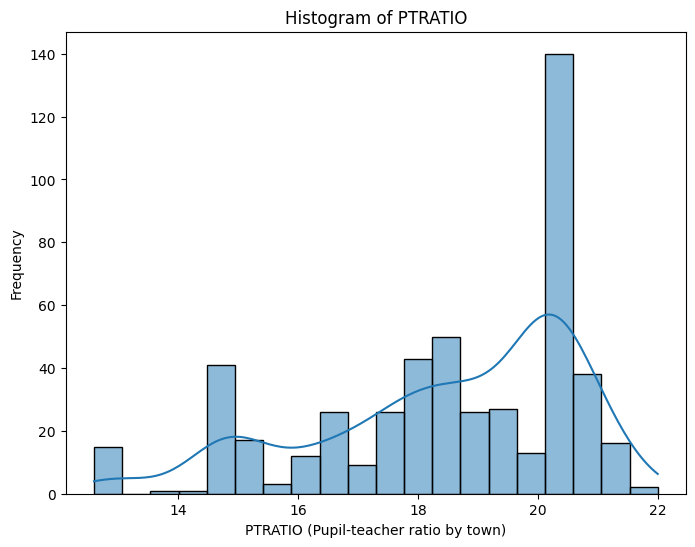

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of PTRATIO')
plt.xlabel('PTRATIO (Pupil-teacher ratio by town)')
plt.ylabel('Frequency')
plt.show()

In [18]:
from scipy import stats

# Splitting data into two groups: bounded by Charles River (CHAS=1) and not bounded (CHAS=0)
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Performing t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Significance level
alpha = 0.05

# Conclusion based on the test
print(f"T-statistic = {t_statistic}")
print(f"P-value = {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in median house values for properties bounded by the Charles River.")
else:
    print("Do not reject the null hypothesis. There is no significant difference in median house values for properties bounded by the Charles River.")


T-statistic = 3.996437466090509
P-value = 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in median house values for properties bounded by the Charles River.


In [19]:
# Adding a categorical variable for age groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', '35-70 years', '70 years and older'])

# Performing one-way ANOVA
result = stats.f_oneway(boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
                        boston_df[boston_df['AGE_group'] == '35-70 years']['MEDV'],
                        boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV'])

# Conclusion based on the test
print(f"F-statistic = {result.statistic}")
print(f"P-value = {result.pvalue}")

if result.pvalue < alpha:
    print("Reject the null hypothesis. There is a difference in median house values among different age groups.")
else:
    print("Do not reject the null hypothesis. There is no significant difference in median house values among different age groups.")


F-statistic = 36.40764999196599
P-value = 1.7105011022702984e-15
Reject the null hypothesis. There is a difference in median house values among different age groups.


In [20]:
# Performing Pearson correlation analysis
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Conclusion based on the test
print(f"Pearson correlation coefficient = {correlation}")
print(f"P-value = {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a correlation between nitrogen oxide concentration and non-retail land proportion.")
else:
    print("Do not reject the null hypothesis. There is no significant correlation between nitrogen oxide concentration and non-retail land proportion.")


Pearson correlation coefficient = 0.7636514469209192
P-value = 7.913361061210442e-98
Reject the null hypothesis. There is a correlation between nitrogen oxide concentration and non-retail land proportion.


In [21]:
import statsmodels.api as sm

# Extracting independent variable (distance to employment centers) and dependent variable (median house value)
X = sm.add_constant(boston_df['DIS'])  # Adding a constant for the analysis
y = boston_df['MEDV']

# Creating a linear regression model
model = sm.OLS(y, X).fit()

# Outputting the results of the regression analysis
print(model.summary())

# Analyzing the significance of the distance to employment centers (DIS) coefficient
if model.pvalues['DIS'] < alpha:
    print("Reject the null hypothesis. Weighted distance to employment centers impacts the median house value.")
else:
    print("Do not reject the null hypothesis. Weighted distance to employment centers does not significantly impact the median house value.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        17:36:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0